In [ ]:
Name: Borris A. Esplanada
Instructor: Engr. Roman Richard
Date: 6/23/24
Section: CPE 019 - CPE 32S1

# **Part 1: Try the MLP Notebook using the CIFAR10 Keras Dataset**

In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt


In [ ]:
data = tf.keras.datasets.cifar10.load_data()

In [ ]:
data


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


Convert the pixels into floating-point values.

In [ ]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale # x_train = x_train/ 255
x_test /= gray_scale


We are converting the pixel values into floating-point values to make the predictions. Changing the numbers into grayscale values will be beneficial as the values become small and the computation becomes easier and faster. As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1

In [ ]:
# Understand the structure of the dataset

print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (50000, 32, 32, 3)
Target matrix: (10000, 32, 32, 3)
Feature matrix: (50000, 1)
Target matrix: (10000, 1)


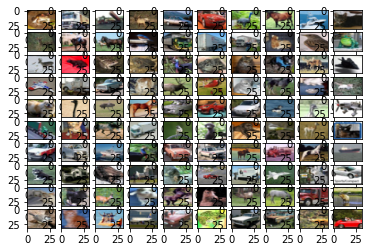

In [ ]:
# Data visualization

fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(32, 32, 3),
						aspect='auto')
		k += 1
plt.show()


In [ ]:
# Form the Input, hidden, and output layers.

model = Sequential([


	Flatten(input_shape=(32, 32, 3)),

	# dense layer 1
	Dense(128, activation='relu'),

	# dense layer 2
	Dense(64, activation='relu'),

	# dense layer 3
	Dense(32, activation='relu'),

	# output layer
  Dense(10, activation='sigmoid')
	])


In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               393344    
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


**Some important points to note:**

The **Sequential model** allows us to create models layer-by-layer as we need in a multi-layer perceptron and is limited to single-input, single-output stacks of layers.

**Flatten** flattens the input provided without affecting the batch size. For example, If inputs are shaped (batch_size,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch_size, 1).

**Activation** is for using the sigmoid activation function.

The first two **Dense layers** are used to make a fully connected model and are the hidden layers.

The last Dense layer is the **output layer** which contains 10 neurons that decide which category the image belongs to.

In [ ]:
# Compile the model

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


**Compile function** is used here that involves the use of loss, optimizers, and metrics. Here loss function used is **sparse_categorical_crossentropy**, optimizer used is **adam**.

In [ ]:
# Fit the model

model.fit(x_train, y_train, epochs=50,
		batch_size=15000,
		validation_split=0.80)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.4014 - accuracy: 0.5149 - val_loss: 1.6436 - val_accuracy: 0.4261
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 1.4003 - accuracy: 0.5138 - val_loss: 1.6438 - val_accuracy: 0.4274
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 1.3997 - accuracy: 0.5112 - val_loss: 1.6426 - val_accuracy: 0.4259
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 1.3989 - accuracy: 0.5133 - val_loss: 1.6444 - val_accuracy: 0.4275
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.3987 - accuracy: 0.5133 - val_loss: 1.6455 - val_accuracy: 0.4256
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 1.3996 - accuracy: 0.5100 - val_loss: 1.6472 - val_accuracy: 0.4271
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.4004 - accuracy: 0.5140 - val_loss: 1.6506 - val_accuracy: 0.4244
Epoch 8/50
1/1 [=========================

**Some important points to note:**

**Epochs** tell us the number of times the model will be trained in forwarding and backward passes.

**Batch Size** represents the number of samples, If it’s unspecified, batch_size will default to 32.

**Validation Split** is a float value between 0 and 1. The model will set apart this fraction of the training data to evaluate the loss and any model metrics at the end of each epoch. (The model will not be trained on this data)

In [ ]:
# Find the accuracy of the model

results = model.evaluate(x_test, y_test, verbose = 1)
print('test loss, test acc:', results)


313/313 [==============================] - 1s 3ms/step - loss: 1.6397 - accuracy: 0.4284
test loss, test acc: [1.6396605968475342, 0.4284000098705292]


# Conclusion


- To conclude, Building an MLP model needs data preparation, model architecture design, training, and evaluation. The effectiveness of the model depends on how well these steps are executed. In summary, through this assignment I've gained practical experience in implementing an MLP model for image classification, which is foundational knowledge in machine learning and neural networks.

We got the **accuracy** of our model 42% by using ```model.evaluate()``` on the test samples.



Google Collab Link: https://drive.google.com/file/d/1Fr7j0KHFZshGEat4znqmiJW54XntetLm/view?usp=sharing